In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
X, y = make_blobs(n_samples=1000, centers=3,n_features=2, random_state=42)

In [24]:
X.shape

(1000, 2)

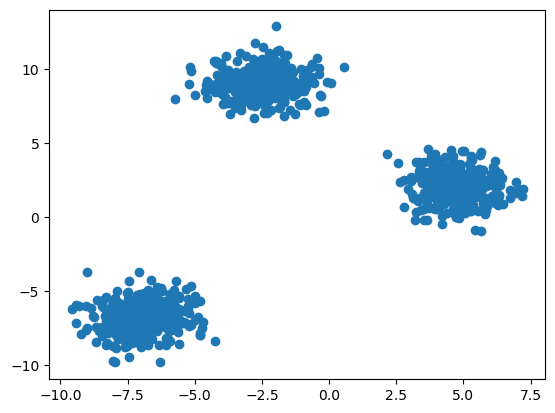

In [25]:
plt.scatter(X[:, 0], X[:, 1] )
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.cluster import KMeans

In [28]:
#elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [29]:
wcss

[52946.1168491972,
 15369.674523316215,
 1599.7085950090789,
 1422.584557764519,
 1225.174338748675,
 1125.9675815496473,
 953.1771062012767,
 835.7740814122135,
 798.4177046565203,
 670.973759587586]

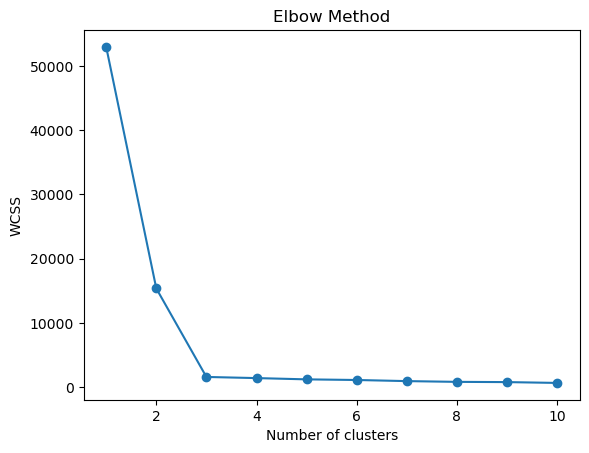

In [33]:
# plot elbow method
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [35]:
y_labels = kmeans.fit_predict(X_train)

In [43]:
y_test_labels = kmeans.predict(X_test)

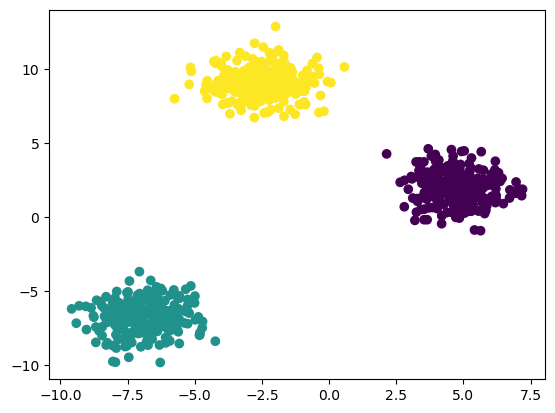

In [44]:
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_labels )
plt.show()

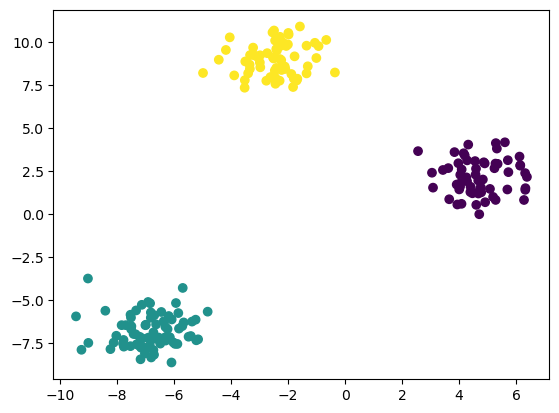

In [45]:
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test_labels )
plt.show()

In [46]:
#knee method
from kneed import KneeLocator


In [47]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing').elbow

In [48]:
kl

3

In [55]:
#perform metrics 
# silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

In [56]:
silhouette_scores

[0.7006603070144354,
 0.8413954746484233,
 0.6613767183377132,
 0.4971398484679803,
 0.47705579874942905,
 0.30892668745790464,
 0.32856319606365275,
 0.33272246105527487,
 0.33432522645351903]

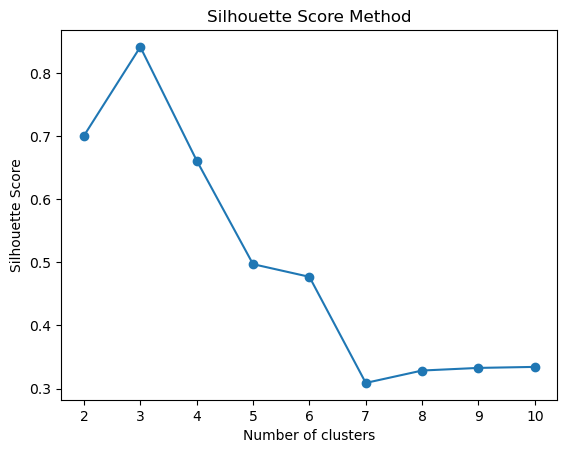

In [59]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xticks(range(2, 11))
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()